In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
import warnings
warnings.simplefilter('ignore')

In [7]:
data=pd.read_csv("D:\\Zoo.csv")

In [9]:
data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [13]:
data.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [15]:
data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


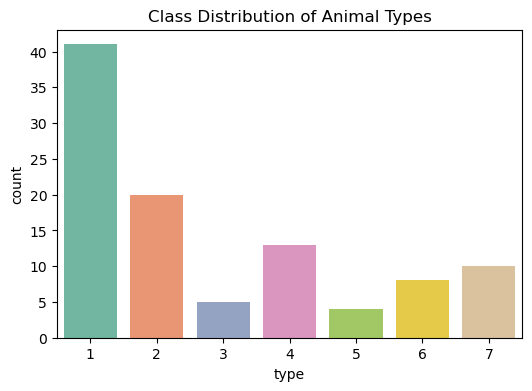

In [19]:
# Target distribution
plt.figure(figsize=(6,4))
sns.countplot(x="type", data=data, palette="Set2")
plt.title("Class Distribution of Animal Types")
plt.show()

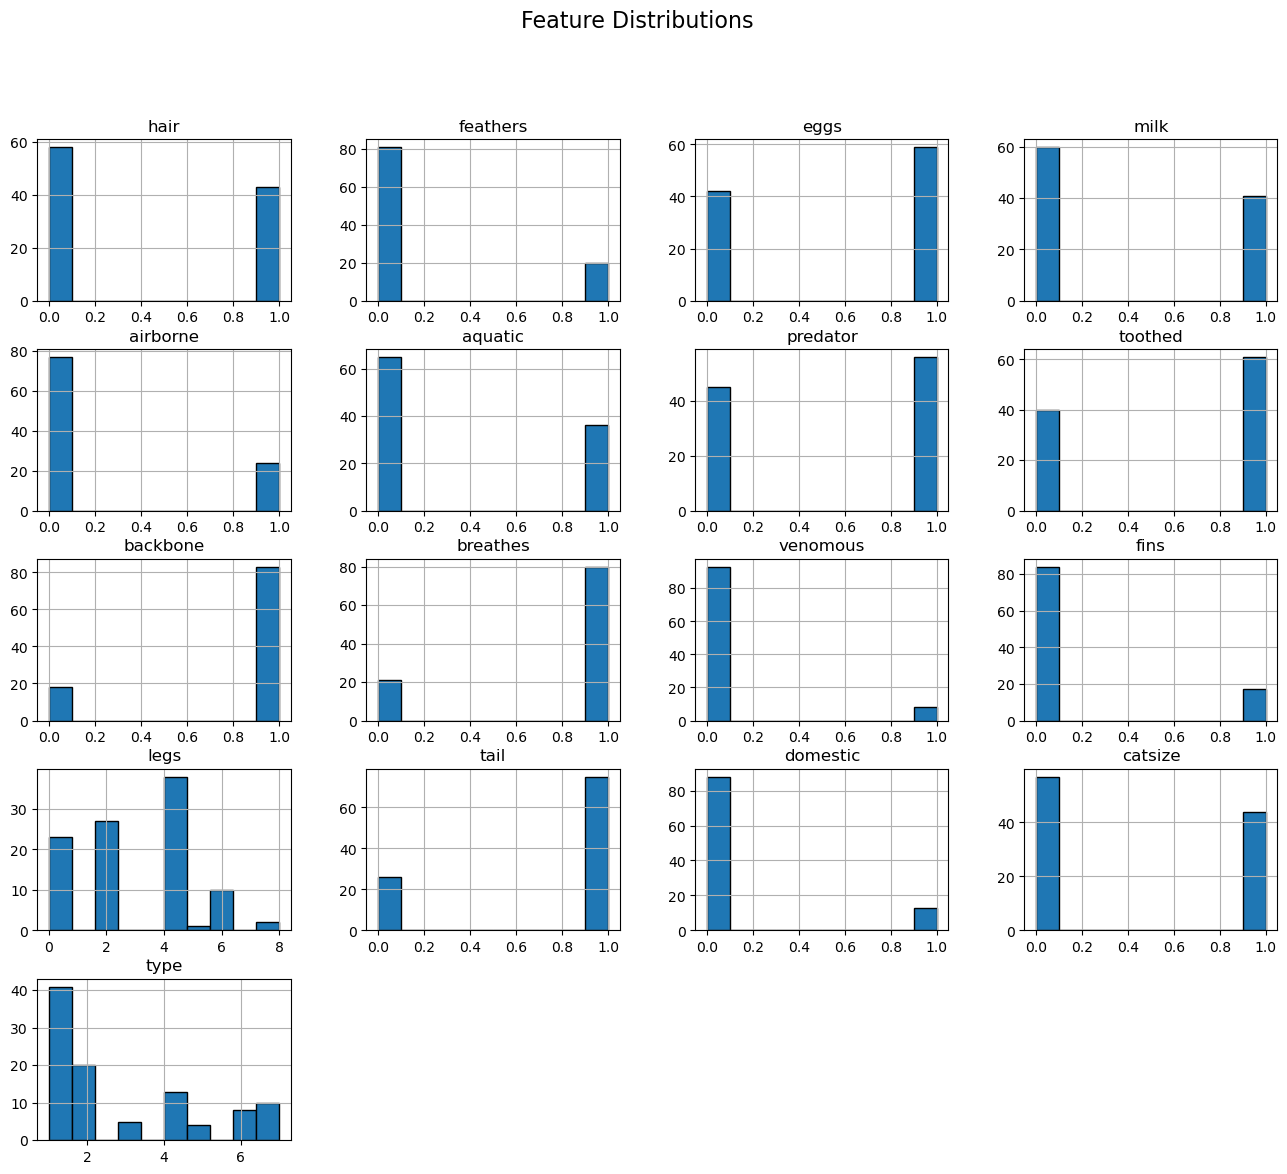

In [23]:
# Histograms for numerical features
data.drop(columns=["animal name"]).hist(figsize=(16,13), bins=10, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

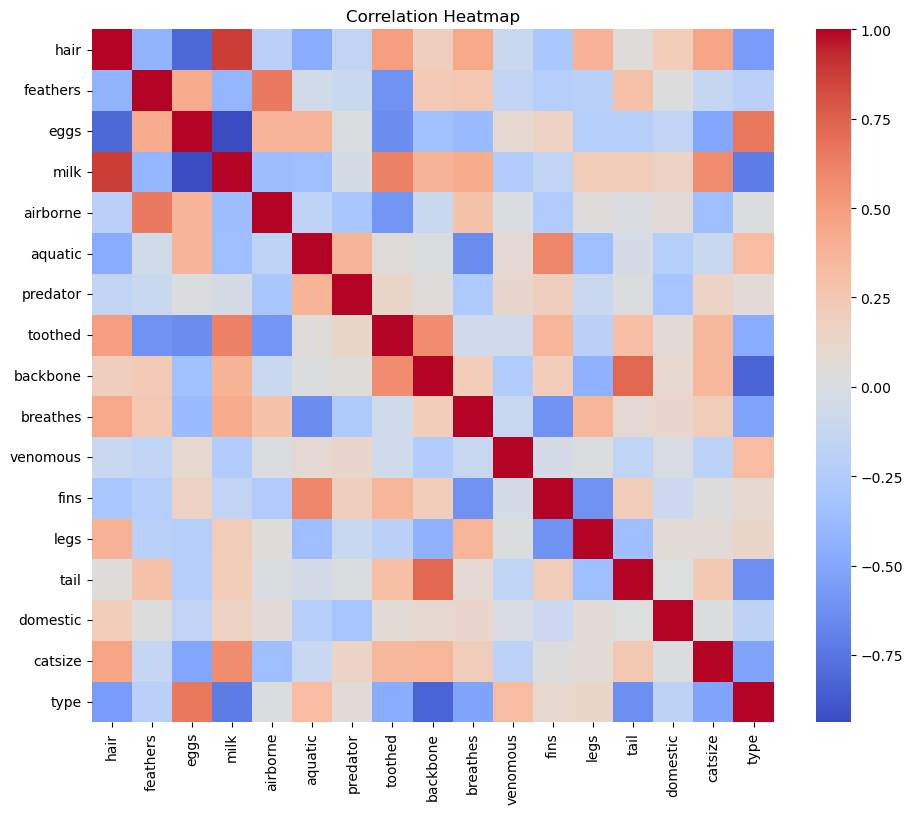

In [29]:
# Correlation heatmap
plt.figure(figsize=(11,9))
sns.heatmap(data.drop(columns=["animal name"]).corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

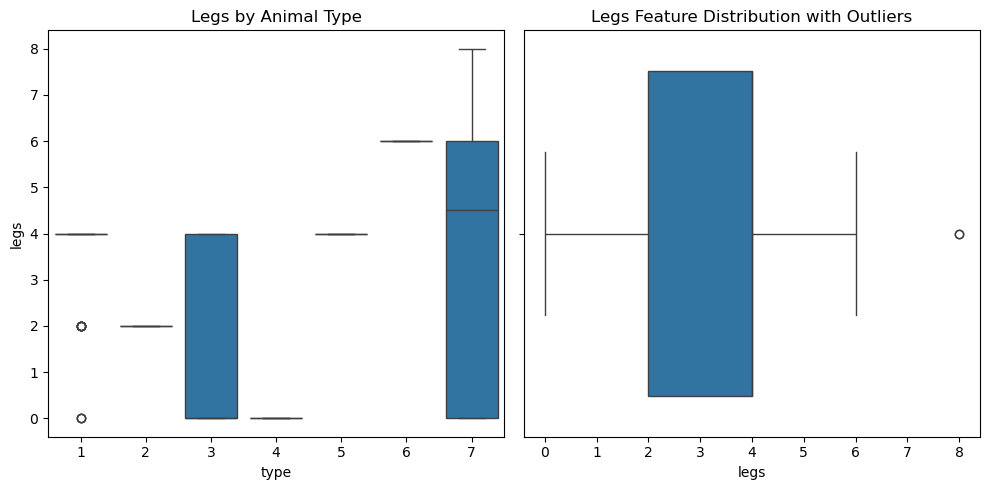

In [33]:
# Boxplot for legs (to check outliers)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x="type", y="legs", data=data)
plt.title("Legs by Animal Type")
plt.subplot(1, 2, 2)
sns.boxplot(x=data['legs'])
plt.title("Legs Feature Distribution with Outliers")
plt.tight_layout()
plt.show()

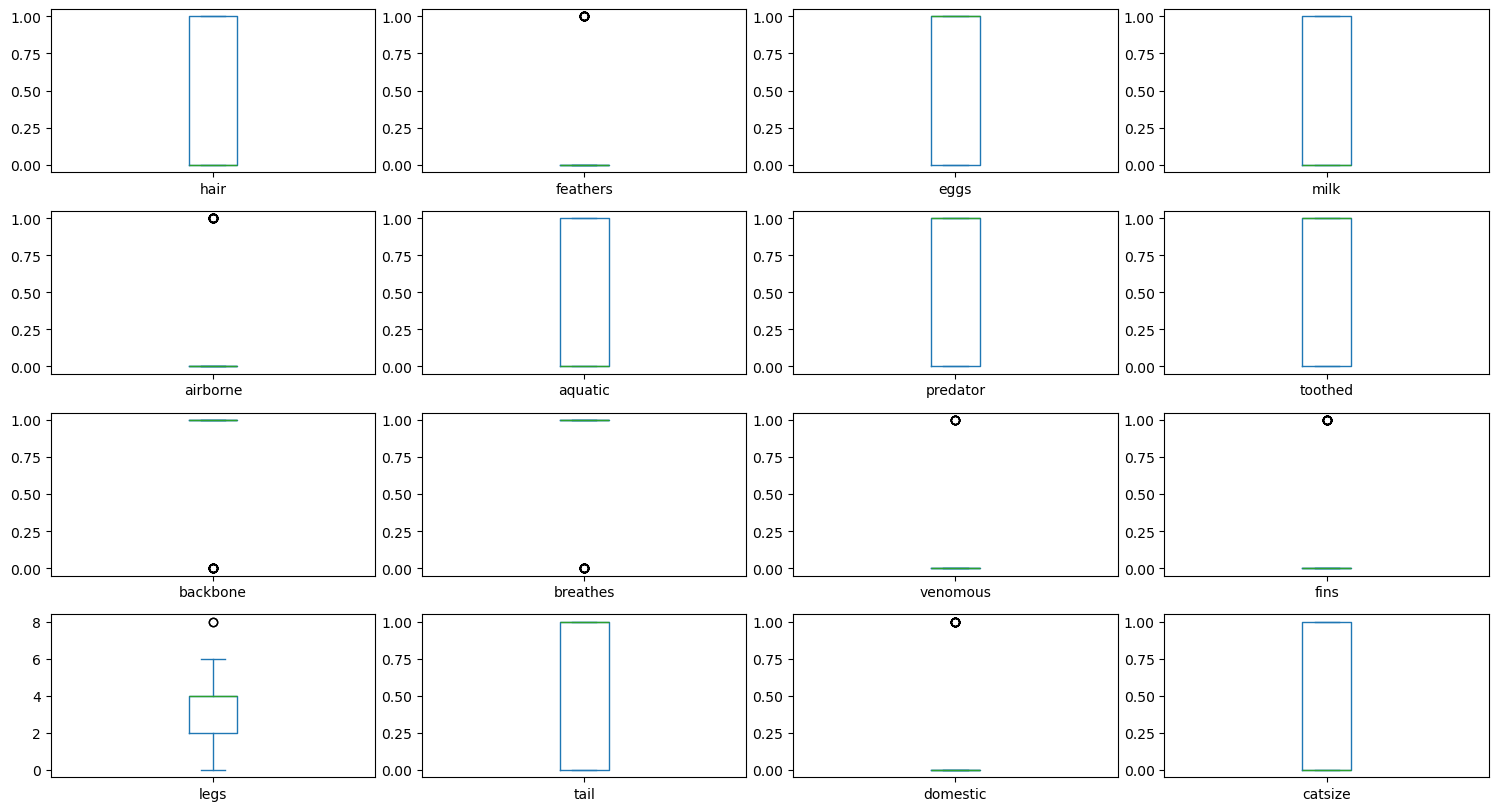

In [35]:
# Outlier Detection with Boxplots
data.drop(columns=["type"]).plot(kind="box", subplots=True, layout=(5,4), figsize=(15,10), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

In [37]:
# Drop unnecessary column
X = data.drop(columns=["animal name", "type"])
y = data["type"]

In [45]:
# Scale features (important for KNN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
     

# Handle outliers: For 'legs' (replace values > 6 with median)
data.loc[data['legs'] > 6, 'legs'] = data['legs'].median()

In [47]:
#Train-Test Split

# Split dataset: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)
# Check shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (80, 16)
X_test shape: (21, 16)
y_train shape: (80,)
y_test shape: (21,)


In [49]:
#Implement KNN Model

# Initial KNN model with K=5
knn = KNeighborsClassifier(n_neighbors=5, metric="euclidean")
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



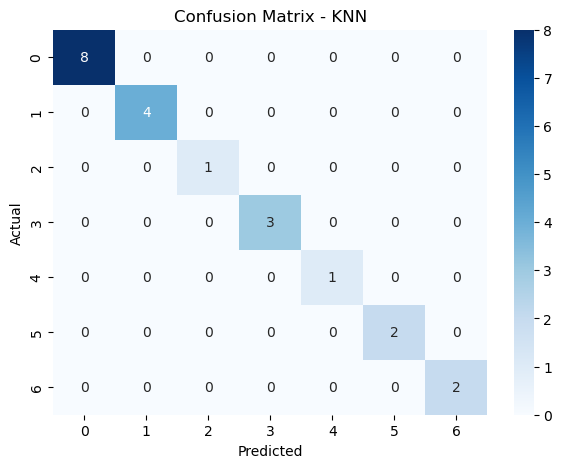

In [51]:
# Confusion Matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [53]:
#Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV

# Grid search for best K and metric
param_grid = {
    "n_neighbors": [3, 5, 7, 9, 11],
    "metric": ["euclidean", "manhattan", "minkowski"]
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring="accuracy")
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3}


In [55]:
# Best model
best_knn = grid.best_estimator_
y_pred_best = best_knn.predict(X_test)

print("Tuned Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nTuned Report:\n", classification_report(y_test, y_pred_best))

Tuned Accuracy: 1.0

Tuned Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



In [57]:
#Decision Boundary (2D PCA)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, test_size=0.2, random_state=42, stratify=y
)

knn_pca = KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors'],
                               metric=grid.best_params_['metric'])
knn_pca.fit(X_train_pca, y_train_pca)

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

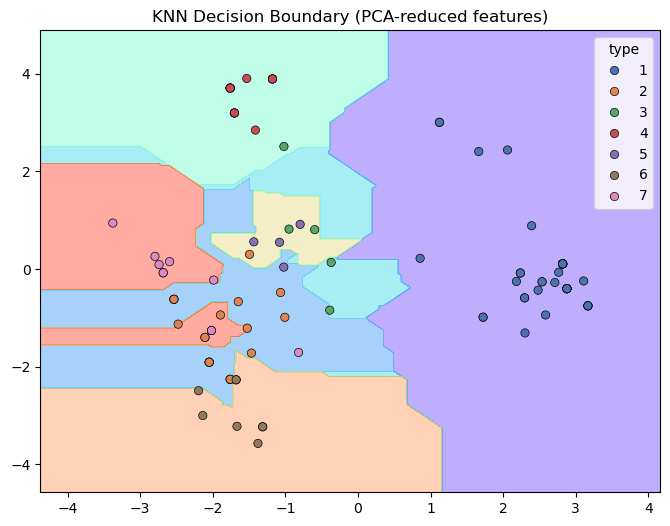

In [59]:
# Plot decision boundary
h = .02
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap="rainbow")
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette="deep", edgecolor="k")
plt.title("KNN Decision Boundary (PCA-reduced features)")
plt.show()

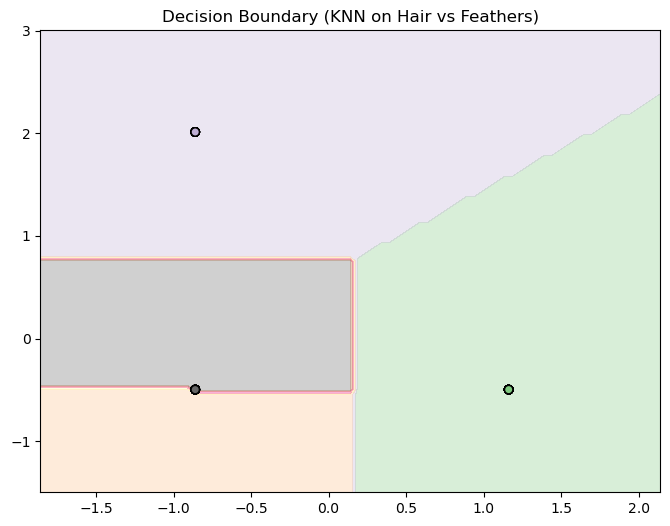

In [61]:
# Subset with first two features
X_vis = X_scaled[:, :2]
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(
    X_vis, y, test_size=0.2, random_state=42, stratify=y
)

knn_vis = KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors'])
knn_vis.fit(X_train_vis, y_train_vis)

# Mesh grid
x_min, x_max = X_vis[:, 0].min()-1, X_vis[:, 0].max()+1
y_min, y_max = X_vis[:, 1].min()-1, X_vis[:, 1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="Accent")
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y, edgecolor="k", cmap="Accent")
plt.title("Decision Boundary (KNN on Hair vs Feathers)")
plt.show()


Interview Questions:-

1 Key hyperparameters in KNN:-

n_neighbors (K): Number of nearest neighbors to consider. A small K may lead to noisy predictions, while a large K smooths the decision boundary. Example: K=3 means the class of a sample is decided by the majority among its 3 closest neighbors.

weights: How neighbors contribute to voting. Can be 'uniform' (all neighbors equal) or 'distance' (closer neighbors weigh more).

algorithm: Method to compute nearest neighbors ('auto', 'ball_tree', 'kd_tree', 'brute').

p: Parameter for Minkowski distance (used if metric='minkowski'). p=1 → Manhattan distance, p=2 → Euclidean distance.


2 Distance metrics in KNN:-
Euclidean distance (default, straight-line distance)

Manhattan distance (sum of absolute differences)

Minkowski distance (generalized form of Euclidean & Manhattan)

Hamming distance (useful for categorical/binary features)

Example: For two animals with features [hair, feathers] = [1, 0] and [1, 1],

Euclidean distance = √((1−1)² + (0−1)²) = 1

Manhattan distance = |1−1| + |0−1| = 1